<a href="https://colab.research.google.com/github/dork-er/face-recognition-model/blob/main/MTCNN_face_detection_and%20classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing and importing libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pickle
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

## Pre-processing images

In [ ]:
img_path = '/content/drive/MyDrive/Datasets/lfw_sorted/Maxwell_Sang/maxwell_sang (1).jpeg'
picture = cv.imread(img_path)

Converting images into the correct form

In [ ]:
# Converting images

picture = cv.cvtColor(picture, cv.COLOR_BGR2RGB)

Extracting faces using mtcnn

In [ ]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
results = detector.detect_faces(picture)

In [ ]:
plt.imshow(picture)

In [ ]:
results

In [ ]:
x,y,w,h = results[0]['box']
img = cv.rectangle(picture, (x,y), (x+w, y+h), (255,0,0), 20)
plt.imshow(img)

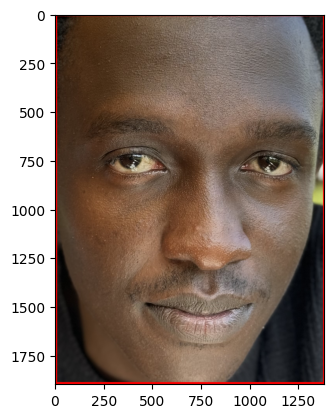

In [ ]:
face = picture[y:y+h, x:x+w]
plt.imshow(face)

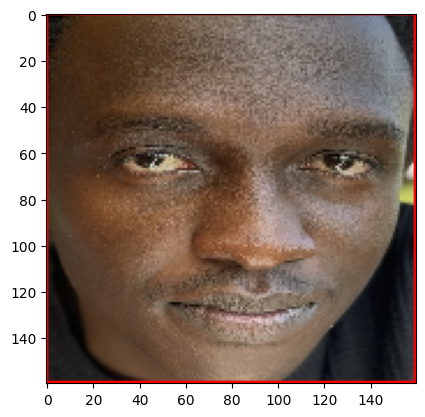

In [ ]:
# Resizing face image to 160*160
face = cv.resize(face, (160,160))
plt.imshow(face)

### Automating the preprocessing

In [ ]:
class FACELOADER:
  def __init__(self,directory):
    self.directory = directory
    self.target_size = (160,160)
    self.X = []
    self.y = []
    self.detector=MTCNN()

  def extract_face(self,filename):
    img = cv.imread(filename)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    x,y,w,h = self.detector.detect_faces(img)[0]['box']
    x, y = abs(x), abs(y)
    face = img[y:y+h, x:x+w]
    face_arr = cv.resize(face, self.target_size)
    return face_arr

  def load_faces(self, dir):
    FACES = []
    for im_name in os.listdir(dir):
      try:
        path = dir + im_name
        single_face = self.extract_face(path)
        FACES.append(single_face)
      except Exception as e:
        pass
    return FACES

  def load_classes(self):
    for subdir in os.listdir(self.directory):
      path = self.directory + '/' + subdir + '/'
      faces = self.load_faces(path)
      labels = [subdir for _ in range(len(faces))]
      print(f'Loaded successfully: {len(labels)}')
      self.X.extend(faces)
      self.y.extend(labels)
    return np.asarray(self.X), np.asarray(self.y)

  def plot_images(self):
    plt.figure(figsize=(18,16))
    for num, image in enumerate(self.X):
      ncols=3
      nrows=len(self.Y)//ncols + 1
      plt.subplot(nrows,ncols,num+1)
      plt.imshow(image)
      plt.axis('off')



In [ ]:
faceloading = FACELOADER('/content/drive/MyDrive/Datasets/lfw_sorted')

In [ ]:
X, Y = faceloading.load_classes()

Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfully: 10
Loaded successfu

## Facenet model

In [ ]:
!pip install keras-facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10368 sha256=67e0beb2b58ef3ba926f5a730eb3b521ae65f8a9f2c55f388dcd460a7261a9f3
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [ ]:
from keras_facenet import FaceNet

In [ ]:
embedder = FaceNet()

def get_embedding(face_img):
  face_img = face_img.astype('float32') # This is 3D
  face_img = np.expand_dims(face_img, axis=0)
  yhat = embedder.embeddings(face_img)
  return yhat[0]

In [ ]:
EMBEDDED_X = []

for img in X:
  EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━

In [ ]:
np.savez_compressed('faces_embeddings.npz', EMBEDDED_X, Y)


## SVM model

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [ ]:
Y

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=17)


In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)


In [ ]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train, ypreds_train)

In [ ]:
accuracy_score(Y_test, ypreds_test)

In [ ]:
with open('svm_model_144classes.pkl', 'wb') as file:
    pickle.dump(model, file)